# Мещерякова Ксения, 932003

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

### Датасет представляет собой классификацию пикселей по 7 типам лесного покрова на основе атрибутов: высота, наклон, тип почвы и т. д.

In [2]:
#открываем файл с данными и выводим на экран
data = pd.read_csv("covtype.data", index_col = 0)
data

,51,3,258,0,510,221,232,148,6279,1,...,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,5
2596,,,,,,,,,,,,,,,,,,,,,
2590,56,2,212,-6,390,220,235,151,6225,1,...,0,0,0,0,0,0,0,0,0,5
2804,139,9,268,65,3180,234,238,135,6121,1,...,0,0,0,0,0,0,0,0,0,2
2785,155,18,242,118,3090,238,238,122,6211,1,...,0,0,0,0,0,0,0,0,0,2
2595,45,2,153,-1,391,220,234,150,6172,1,...,0,0,0,0,0,0,0,0,0,5
2579,132,6,300,-15,67,230,237,140,6031,1,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2396,153,20,85,17,108,240,237,118,837,0,...,0,0,0,0,0,0,0,0,0,3
2391,152,19,67,12,95,240,237,119,845,0,...,0,0,0,0,0,0,0,0,0,3
2386,159,17,60,7,90,236,241,130,854,0,...,0,0,0,0,0,0,0,0,0,3


In [12]:
#Переименнуем часть столцов, которые будем использовать
data = data.rename(columns = {'2596' : 'Elevation',
                         '51' : 'Aspect',
                         '3' : 'Slope',
                         '258' : 'Horizontal_Distance_To_Hydrology',
                         '0' : 'Vertical_Distance_To_Hydrology',
                         '510' : 'Horizontal_Distance_To_Roadways',
                         '221' : 'Hillshade_9am',
                         '232' : 'Hillshade_Noon',
                         '148' : 'Hillshade_3pmStrength', '5' : 'Cover_Type'})

In [13]:
#Выводим первые 5 записей
data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pmStrength,6279,...,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,Cover_Type
0,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
1,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
2,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
3,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
4,2579,132,6,300,-15,67,230,237,140,6031,...,0,0,0,0,0,0,0,0,0,2


In [14]:
#Выводим последние 5 записей
data.tail()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pmStrength,6279,...,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,Cover_Type
581006,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581007,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581008,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581009,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3
581010,2383,165,13,60,4,67,231,244,141,875,...,0,0,0,0,0,0,0,0,0,3


In [11]:
data=data.reset_index() 
data

,2596,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pmStrength,6279,...,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,Cover_Type
0,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
1,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
2,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
3,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
4,2579,132,6,300,-15,67,230,237,140,6031,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581006,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581007,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581008,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581009,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


In [15]:
data['Elevation'].value_counts()

Elevation
2968    1681
2962    1674
2991    1671
2972    1662
2975    1656
        ... 
3779       1
1912       1
3659       1
3771       1
3852       1
Name: count, Length: 1978, dtype: int64

In [16]:
#Описание данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581011 entries, 0 to 581010
Data columns (total 55 columns):
 #   Column                            Non-Null Count   Dtype
---  ------                            --------------   -----
 0   Elevation                         581011 non-null  int64
 1   Aspect                            581011 non-null  int64
 2   Slope                             581011 non-null  int64
 3   Horizontal_Distance_To_Hydrology  581011 non-null  int64
 4   Vertical_Distance_To_Hydrology    581011 non-null  int64
 5   Horizontal_Distance_To_Roadways   581011 non-null  int64
 6   Hillshade_9am                     581011 non-null  int64
 7   Hillshade_Noon                    581011 non-null  int64
 8   Hillshade_3pmStrength             581011 non-null  int64
 9   6279                              581011 non-null  int64
 10  1                                 581011 non-null  int64
 11  0.1                               581011 non-null  int64
 12  0.2             

Метод data.info() выводит информацию о данных: названия столбцов, количество ненулевых значений, тип данных и использование памяти. В данном датасете все столбцы числового типа данных(int), а также ни в одном их них нет нулевых значений

In [17]:
#Статистика данных
data.describe()

,index,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pmStrength,...,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,Cover_Type
count,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,...,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000
mean,290505.000000,2959.365926,155.656988,14.103723,269.428236,46.418935,2350.149779,212.146033,223.318701,142.528253,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051465
std,167723.572964,279.984569,111.913733,7.488234,212.549538,58.295250,1559.254343,26.769909,19.768711,38.274561,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121792,1.396500
min,0.000000,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,145252.500000,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,290505.000000,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,435757.500000,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,581010.000000,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [18]:
#Выводим названия столбцов
data.columns

Index(['index', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pmStrength', '6279', '1', '0.1', '0.2', '0.3', '0.4', '0.5',
       '0.6', '0.7', '0.8', '0.9', '0.10', '0.11', '0.12', '0.13', '0.14',
       '0.15', '0.16', '0.17', '0.18', '0.19', '0.20', '0.21', '0.22', '0.23',
       '0.24', '0.25', '0.26', '0.27', '0.28', '0.29', '0.30', '0.31', '1.1',
       '0.32', '0.33', '0.34', '0.35', '0.36', '0.37', '0.38', '0.39', '0.40',
       '0.41', '0.42', 'Cover_Type'],
      dtype='object')

In [17]:
# Разделение данных на признаки (X) и целевую переменную (y)
X = data[['Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am']]
y = data['Cover_Type']

In [18]:
# Построение модели RandomForest
rf_model = RandomForestClassifier()
rf_model.fit(X, y)

c:\users\ksenia\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


RandomForestClassifier()

In [19]:
# Построение модели DecisionTree
dt_model = DecisionTreeClassifier()
dt_model.fit(X, y)

c:\users\ksenia\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


DecisionTreeClassifier()

In [20]:
# Построение модели LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X, y)

c:\users\ksenia\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\users\ksenia\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

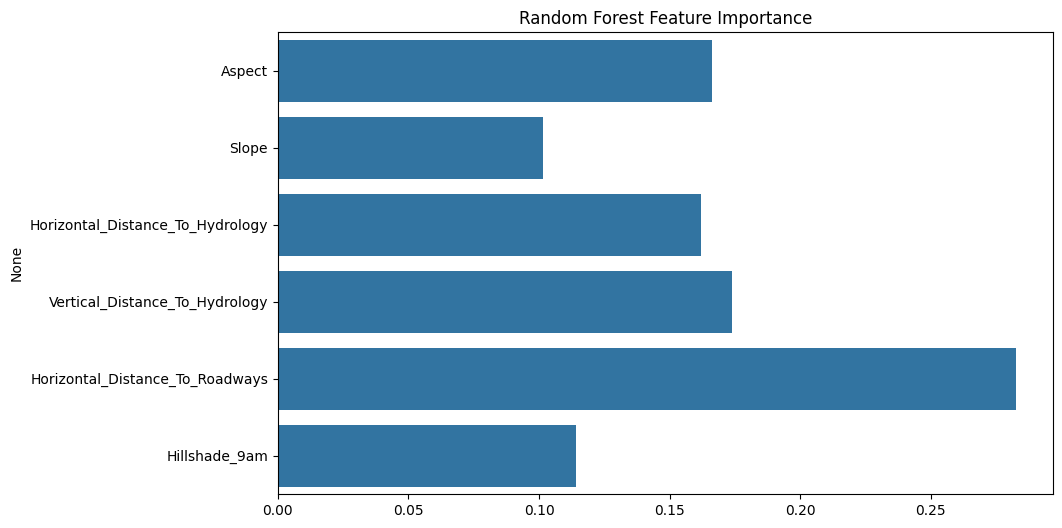

In [27]:
plt.figure(figsize=(10, 6))
sns.barplot(x=rf_model.feature_importances_, y=X.columns)
plt.title('Random Forest Feature Importance')
plt.show()


По данному графику можно понять, какие признаки (features) вносят наибольший вклад в модель RandomForest. Каждый столбец на графике представляет важность определенного признака для модели. Чем больше значение столбца, тем больший вклад вносит соответствующий признак. Следовательно, столбец "Горизонтальное расстояние до дорог" представляет наибольшую ценность для модели RandomForest

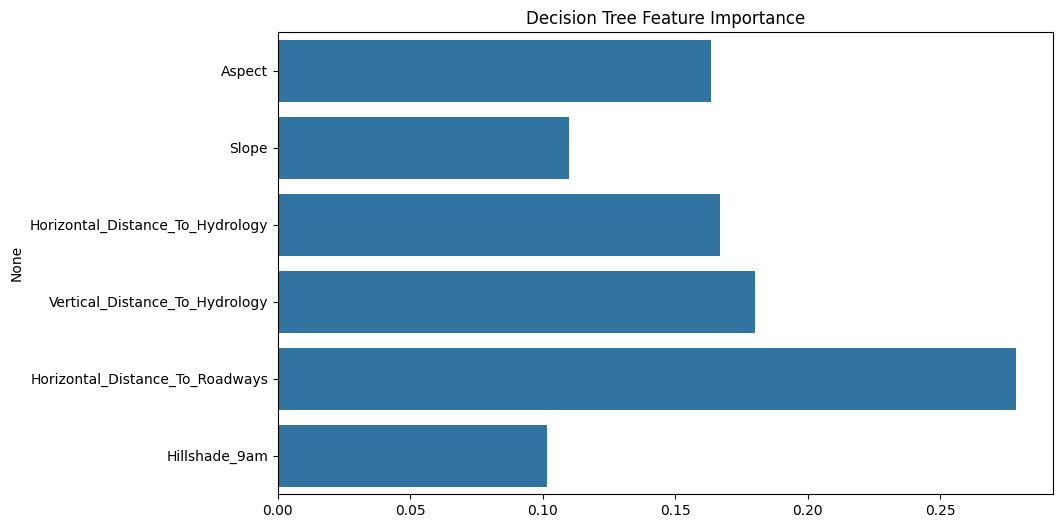

In [37]:
plt.figure(figsize=(10, 6))
sns.barplot(x=dt_model.feature_importances_, y=X.columns)
plt.title('Decision Tree Feature Importance')
plt.show()

По данному графику можно понять, какие признаки (features) вносят наибольший вклад в модель DecisionTree. Каждый столбец на графике представляет важность определенного признака для модели. Чем больше значение столбца, тем больший вклад вносит соответствующий признак. Следовательно, столбец "Горизонтальное расстояние до дорог" представляет наибольшую ценность для модели DecisionTree

In [21]:
rf_importances = rf_model.feature_importances_
dt_importances = dt_model.feature_importances_
lr_importances = lr_model.coef_[0]
# Создание DataFrame с значениями важности признаков
importance_df = pd.DataFrame({'Features': X.columns, 'RandomForest': rf_importances, 'DecisionTree': dt_importances, 'LogisticRegression': lr_importances})

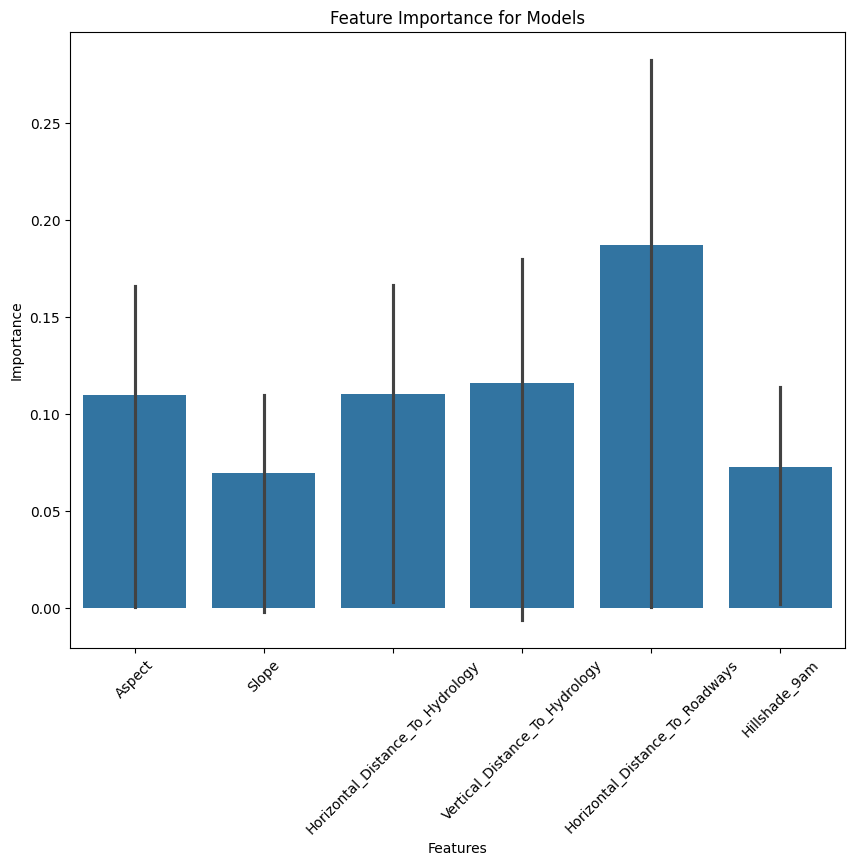

In [32]:
# Визуализация значений важности признаков
plt.figure(figsize=(10, 8))
sns.barplot(x='Features', y='Importance', data=importance_df.melt(id_vars='Features', var_name='Model', value_name='Importance'))
plt.title('Feature Importance for Models')
plt.xticks(rotation=45)

plt.show()

Путем сравнения столбцов для различных моделей можно определить, какие признаки оказывают наибольшее влияние на все модели. По графику видно, что "Горизонтальное расстояние до дорог" представляет наибольшую ценность для всех моделей

In [24]:
from sklearn.preprocessing import label_binarize

models = [rf_model, dt_model, lr_model]
for model in models:
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    
    y_test_binarized = label_binarize(y_test, classes=model.classes_)
    y_pred_binarized = label_binarize(y_pred, classes=model.classes_)
    
    # ROC-кривая
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(model.classes_)):
        fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_binarized[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_pred_binarized.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    print(f"Model: {model.__class__.__name__}, Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, ROC AUC (micro): {roc_auc['micro']}")

c:\users\ksenia\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


Model: RandomForestClassifier, Accuracy: 0.9999741831105909, Precision: 0.9999741836683765, Recall: 0.9999741831105909, ROC AUC (micro): 0.9999849401478448


c:\users\ksenia\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


Model: DecisionTreeClassifier, Accuracy: 0.9999827887403939, Precision: 0.999982789552744, Recall: 0.9999827887403939, ROC AUC (micro): 0.9999899600985631


c:\users\ksenia\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\users\ksenia\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model: LogisticRegression, Accuracy: 0.487173308778603, Precision: 0.4080639691216, Recall: 0.487173308778603, ROC AUC (micro): 0.7008510967875183


Вывод:
* RandomForestClassifier и DecisionTreeClassifier показывают практически идеальную точность, precision и recall близки к 1, что указывает на высокую эффективность этих моделей в классификации данных.
* Модель LogisticRegression демонстрирует гораздо более низкие значения точности, precision и recall, что говорит о том, что данная модель не так хорошо справляется с задачей классификации в данном наборе данных.
* Когда речь идет о ROC AUC (micro), RandomForestClassifier и DecisionTreeClassifier также превосходят LogisticRegression, показывая более высокие значения. Однако, следует отметить, что значение ROC AUC (micro) для LogisticRegression все равно выше 0,5, что указывает на ее способность превышать случайный выбор в классификации.

Таким образом, RandomForestClassifier и DecisionTreeClassifier являются более подходящими моделями для данного набора данных

c:\users\ksenia\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\users\ksenia\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\users\ksenia\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


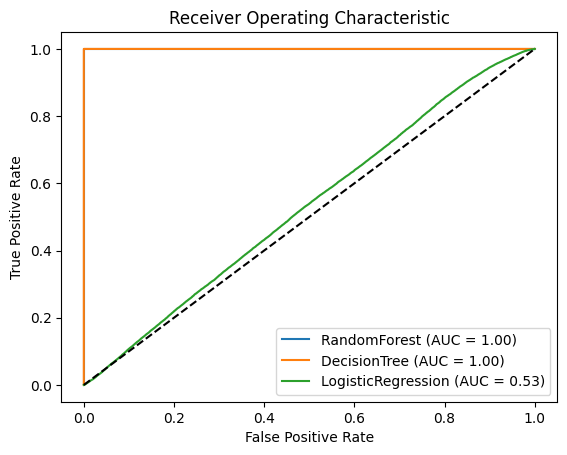

In [26]:
models = [rf_model, dt_model, lr_model]
model_names = ['RandomForest', 'DecisionTree', 'LogisticRegression']

for model, model_name in zip(models, model_names):
    y_pred_binarized = model.predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test_binarized[:, 1], y_pred_binarized[:, 1])
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Случайная модель
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

Графики ROC-кривых для моделей RandomForest, DecisionTree и LogisticRegression позволяют наглядно сравнить их производительность в различении классов. Во кривым видно, что модели RandomForest и DecisionTree более эффективны по сравнению с LogisticRegression

In [23]:
# Разделение на обучающий и тестовый наборы данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
# Подбор гиперпараметров для модели RandomForest
rf_param_grid = {'n_estimators': [10, 20, 30], 'max_depth': [10, 20, 30]}
rf_grid_search = GridSearchCV(RandomForestClassifier(), rf_param_grid, cv=5)
rf_grid_search.fit(X_train, y_train)
rf_best_model = rf_grid_search.best_estimator_

c:\users\ksenia\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\users\ksenia\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\users\ksenia\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\users\ksenia\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a

c:\users\ksenia\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\users\ksenia\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\users\ksenia\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\users\ksenia\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a

c:\users\ksenia\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\users\ksenia\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\users\ksenia\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\users\ksenia\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a

c:\users\ksenia\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


In [42]:
# Подбор гиперпараметров для модели DecisionTree
dt_param_grid = {'max_depth': [10, 20, 30]}
dt_grid_search = GridSearchCV(DecisionTreeClassifier(), dt_param_grid, cv=5)
dt_grid_search.fit(X_train, y_train)
dt_best_model = dt_grid_search.best_estimator_

c:\users\ksenia\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\users\ksenia\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\users\ksenia\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\users\ksenia\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a

c:\users\ksenia\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


In [43]:
# Подбор гиперпараметров для модели LogisticRegression
lr_param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
lr_grid_search = GridSearchCV(LogisticRegression(), lr_param_grid, cv=5)
lr_grid_search.fit(X_train, y_train)
lr_best_model = lr_grid_search.best_estimator_

c:\users\ksenia\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\users\ksenia\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\ksenia\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future ve

c:\users\ksenia\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\ksenia\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\users\ksenia\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future ve

c:\users\ksenia\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\ksenia\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\users\ksenia\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future ve

c:\users\ksenia\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\ksenia\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\users\ksenia\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future ve

In [52]:
from sklearn.preprocessing import label_binarize

models = [rf_best_model, dt_best_model, lr_best_model]
for model in models:
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    
    y_test_binarized = label_binarize(y_test, classes=model.classes_)
    y_pred_binarized = label_binarize(y_pred, classes=model.classes_)
    
    # ROC-кривая
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(model.classes_)):
        fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_binarized[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_pred_binarized.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    print(f"Model: {model.__class__.__name__}, Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, ROC AUC (micro): {roc_auc['micro']}")

c:\users\ksenia\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


Model: RandomForestClassifier, Accuracy: 0.7060144746693287, Precision: 0.7040333389478393, Recall: 0.7060144746693287, ROC AUC (micro): 0.8285084435571084


c:\users\ksenia\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


Model: DecisionTreeClassifier, Accuracy: 0.6410419696565494, Precision: 0.6345111691829353, Recall: 0.6410419696565494, ROC AUC (micro): 0.7906078156329871


c:\users\ksenia\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\users\ksenia\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model: LogisticRegression, Accuracy: 0.4889718854074335, Precision: 0.4230944804823311, Recall: 0.4889718854074335, ROC AUC (micro): 0.7019002664876696


Вывод:
* RandomForestClassifier показывает наивысшую точность (примерно 0,706) среди всех моделей, что указывает на ее относительно лучшую способность к правильной классификации данных.
* DecisionTreeClassifier также демонстрирует приемлемые, но ниже, чем у RandomForestClassifier, значения точности
* Модель LogisticRegression продемонстрировала наихудшие результаты по сравнению с двумя другими моделями, имея самые низкие значения точности. Это указывает на то, что данная модель, возможно, не является наилучшим выбором для данного конкретного набора данных.
* По значениям ROC AUC (micro) также видно, что RandomForestClassifier и DecisionTreeClassifier имеют более высокие показатели, чем LogisticRegression, подтверждая их относительную эффективность в классификации данных.

Таким образом, на основе этих результатов можно рекомендовать использование RandomForestClassifier или DecisionTreeClassifier для данного набора данных, в то время как LogisticRegression может потребовать дополнительного анализа и настройки для улучшения производительности.

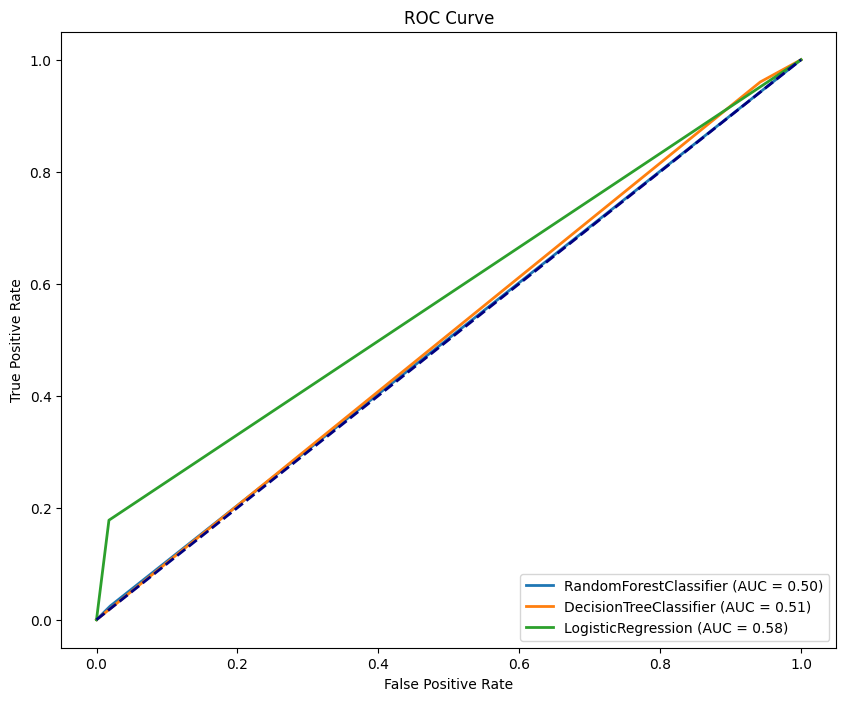

In [55]:
# График ROC-кривой
plt.figure(figsize=(10, 8))
for i in range(len(models)):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'{models[i].__class__.__name__} (AUC = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

График ROC-кривой представляет собой кривые для каждой модели, отображающие отношение между долей ложноположительных и истинноположительных классификаций.
Значение площади под кривой ROC (AUC) для каждой модели также отображено на графике и служит метрикой оценки производительности модели. Чем ближе значение AUC к 1, тем лучше производительность модели.
По графику видно, что при подборе гиперпараметров модель LogisticRegression становится немного эффективнее, чем раньше

### Вывод:
В отношении моделей без подбора гиперпараметров, можно сделать вывод, что RandomForestClassifier и DecisionTreeClassifier показывают высокую точность, полноту и ROC AUC, что говорит об их хорошей способности классифицировать данные.

В случае моделей с подбором гиперпараметров, все они показывают более низкие значения точности, полноты и ROC AUC по сравнению с моделями без подбора гиперпараметров. Однако, RandomForestClassifier все еще имеет достаточно высокие значения, что может указывать на то, что он остается наиболее предпочитаемой моделью из представленных.